In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
scores = pd.read_csv('./ex2/ex2data1.txt',header=None,names=['A','B','Pass'])

In [4]:
scores[:5]

,A,B,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# Section 1.1

In [5]:
gotin = scores[scores.Pass == 1]
notin = scores[scores.Pass == 0]

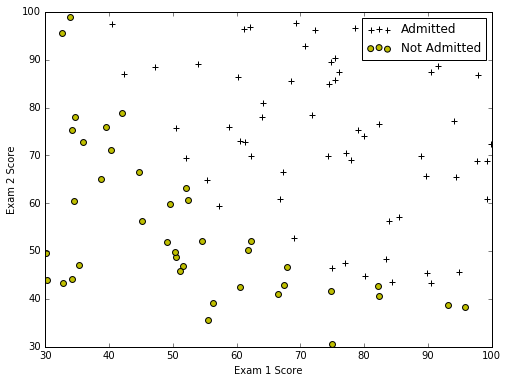

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(gotin.A,gotin.B,marker='+',c='k',s=35,label='Admitted')
ax.scatter(notin.A,notin.B,marker='o',c='y',s=35,label='Not Admitted')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.set_xlim(30,100)
ax.set_ylim(30,100)
ax.legend()

# Section 1.2

In [7]:
import math

In [8]:
def sigmoid(x):
    g = 1/(1+math.e**(-x))
    return g

In [9]:
print(sigmoid(1e6))
print(sigmoid(-100))
print(sigmoid(0))

1.0
3.7200759760208555e-44
0.5


In [10]:
xes = np.array(range(10))
sigmoid(xes)

array([ 0.5       ,  0.73105858,  0.88079708,  0.95257413,  0.98201379,
        0.99330715,  0.99752738,  0.99908895,  0.99966465,  0.99987661])

In [11]:
h_xes = sigmoid(xes)
y = xes
J = 1/len(h_xes)*np.sum(-1.*y*np.log10(h_xes)-(1.-y)*np.log10(1-h_xes))
print(J)

-10.3704903354


In [12]:
gradJ = 1/len(h_xes)*np.sum((h_xes-y)*xes)
print(gradJ)

-24.0780040429


In [193]:
X = scores.ix[:,:2]
#xones = np.insert(np.array(X), 0 , 1, axis=1)
X.insert(0, 'ones', 1)
y = scores.Pass
theta = np.zeros(len(X.ix[0,:]))
print(theta)

[ 0.  0.  0.]


In [114]:
import scipy.optimize as op

In [223]:
#test parameters theta = (0,0), should be about 0.693
Xdata = scores.ix[:,:2]
Xdata.insert(0, 'ones', 1)
ydata = scores.Pass
th0 = np.zeros((len(Xdata.ix[0,:]),1))
print('Initial Theta = \n',th0,'\n')

def CostFunc(theta,X,y):
    h_xes = sigmoid(X.dot(theta))
    yarr = np.array(y)
#    print(h_xes[:5])
    J = np.sum(-yarr.dot(np.log(sigmoid(X.dot(theta))))
               -(1-yarr).dot(np.log(1-sigmoid(X.dot(theta)))))/len(y)
    print(J)
    return J
    
def gradJ(theta,X,y):
    h_xes = sigmoid(X.dot(theta))
#    print(h_xes[:5])
    hsuby = h_xes.subtract(y,axis=0)
#    print(hsuby[:5])
#    print(hsuby[:, np.newaxis]*X)
#    gradJ = 1/len(y)*np.sum(np.array(h_xes.subtract(y,axis=0))*X)
    gradJ = 1/len(y)*np.sum(hsuby[:, np.newaxis]*X)
    return gradJ

print("J =")
cost = CostFunc(th0,Xdata,ydata)
print(cost,'\n')

print("Gradient =")
grad = gradJ(th0,Xdata,ydata)
print(cost,'\n')

Initial Theta = 
 [[ 0.]
 [ 0.]
 [ 0.]] 

J =
0.69314718056
0.69314718056 

Gradient =


TypeError: unhashable type: 'slice'

In [235]:
res = op.minimize(fun = CostFunc,
            x0 = th0,
            args = (Xdata,ydata),
            method = 'TNC',
            jac=gradJ)
print(res.x)

0.69314718056
0.693143141178
0.631812360263
0.631812360196
0.58924253159
0.589242529867
0.422782468563
0.422782458148
0.407292687403
0.407292685636
0.381885519755
0.381885132148
0.378623498359
0.378623493561
0.265712080987
0.238926772015
0.238926172145
0.204720382659
0.204720364974
0.204671386111
0.204671385466
0.20353031806
0.203530306409
0.203529353957
0.203529353957
0.203525113824
0.203525113824
0.203498411172
0.20349841117
0.203497838551
0.203497838551
0.203497790921
0.203497790872
0.203497739018
0.203497739018
0.203497701589
0.203497701589
[-25.16131839   0.20623159   0.20147148]


### Find a way to plot decision boundary using these values for $\theta$.

Check scikit-learn:
http://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot

In [238]:
res.x[1]

0.20623158700299848

In [243]:
xx = np.linspace(30,100,100)
fit = (0.5 - res.x[0] - res.x[1]*xx)/res.x[2]
fit

array([ 96.66068069,  95.93690425,  95.21312781,  94.48935137,
        93.76557492,  93.04179848,  92.31802204,  91.59424559,
        90.87046915,  90.14669271,  89.42291626,  88.69913982,
        87.97536338,  87.25158694,  86.52781049,  85.80403405,
        85.08025761,  84.35648116,  83.63270472,  82.90892828,
        82.18515183,  81.46137539,  80.73759895,  80.01382251,
        79.29004606,  78.56626962,  77.84249318,  77.11871673,
        76.39494029,  75.67116385,  74.9473874 ,  74.22361096,
        73.49983452,  72.77605808,  72.05228163,  71.32850519,
        70.60472875,  69.8809523 ,  69.15717586,  68.43339942,
        67.70962297,  66.98584653,  66.26207009,  65.53829365,
        64.8145172 ,  64.09074076,  63.36696432,  62.64318787,
        61.91941143,  61.19563499,  60.47185854,  59.7480821 ,
        59.02430566,  58.30052922,  57.57675277,  56.85297633,
        56.12919989,  55.40542344,  54.681647  ,  53.95787056,
        53.23409411,  52.51031767,  51.78654123,  51.06

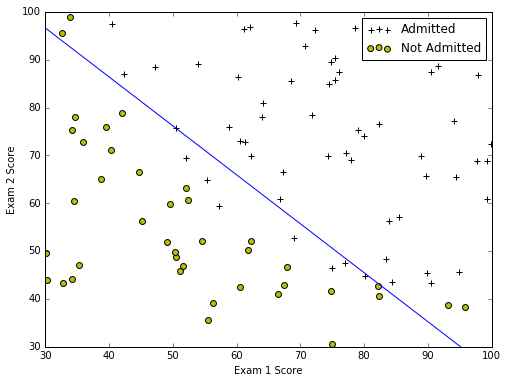

In [246]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(gotin.A,gotin.B,marker='+',c='k',s=35,label='Admitted')
ax.scatter(notin.A,notin.B,marker='o',c='y',s=35,label='Not Admitted')
xx = np.linspace(30,100,100)
fit = (0.5 - res.x[0] - res.x[1]*xx)/res.x[2]
ax.plot(xx,fit,c='b')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.set_xlim(30,100)
ax.set_ylim(30,100)
ax.legend()

In [233]:
#test values
testx = np.array([1, 45, 85]) #should return P=0.776
sigmoid(testx.dot(res.x.T))

0.77629061995213022

## See how well we predict the classes of the training set:

In [247]:
prob = sigmoid(Xdata.dot(res.x.T))
scores['Predict'] = np.where(prob >= 0.5, 1, 0)
diff = scores['Pass']-scores['Predict']
perc = 1 + sum(diff)/len(diff)
print("Percent correct: ",perc*100,'%')

Percent correct:  99.0 %


# Section 2

In [249]:
micro = pd.read_csv('./ex2/ex2data2.txt',header=None,names=['A','B','Pass'])

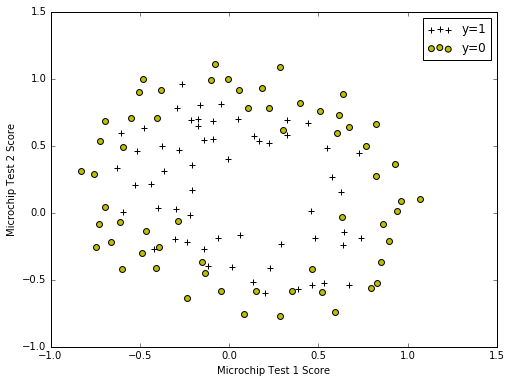

In [257]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(micro[micro.Pass == 1].A,micro[micro.Pass == 1].B,marker='+',c='k',s=35,label='y=1')
ax.scatter(micro[micro.Pass == 0].A,micro[micro.Pass == 0].B,marker='o',c='y',s=35,label='y=0')
ax.set_xlabel('Microchip Test 1 Score')
ax.set_ylabel('Microchip Test 2 Score')
ax.legend()